In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_yds_att_salary_19-20')

In [3]:
rbs.dtypes

NAME             object
YDS/ATT         float64
YDS/ATT_rank    float64
salary            int64
dtype: object

In [4]:
rbs.head()

,NAME,YDS/ATT,YDS/ATT_rank,salary
0,Derrius Guice,5.8,4.0,1135483
1,Rashaad Penny,5.7,5.0,2691360
2,Raheem Mostert,5.6,6.5,2900000
3,Tony Pollard,5.3,10.0,796945
4,Devin Singletary,5.1,12.0,974500


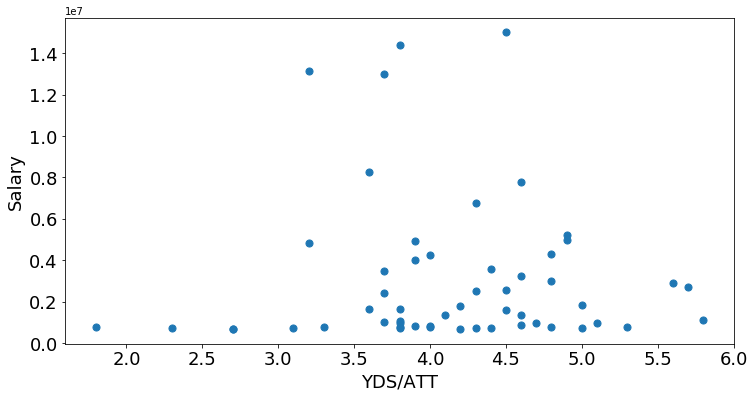

In [5]:
ax = rbs.plot(kind="scatter", x = 'YDS/ATT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS/ATT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['YDS/ATT', 'salary']])

In [7]:
X.mean(axis = 0)

array([-2.30268479e-16, -2.46716228e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.2608371 , -0.5415056 ],
       [-0.42153138,  3.00908332],
       [ 1.03170388, -0.25071603],
       [-2.03126891, -0.67188893],
       [-0.22590356,  0.62034452]])

In [11]:
km.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 4, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 4, 0, 1, 0,
       0, 4, 0, 1, 4, 3, 3, 3, 3, 3], dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,YDS/ATT,YDS/ATT_rank,salary,clusters
0,Derrius Guice,5.8,4.0,1135483,2
1,Rashaad Penny,5.7,5.0,2691360,2
2,Raheem Mostert,5.6,6.5,2900000,2
3,Tony Pollard,5.3,10.0,796945,2
4,Devin Singletary,5.1,12.0,974500,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[3.92777778e+00, 1.17653639e+06],
       [3.80000000e+00, 1.38750000e+07],
       [4.95555556e+00, 2.21652744e+06],
       [2.52000000e+00, 7.10228400e+05],
       [3.95555556e+00, 5.33182211e+06]])

In [14]:
rbs.groupby('clusters')[['YDS/ATT', 'salary']].mean()

,YDS/ATT,salary
clusters,,
0,3.927778,1.176536e+06
1,3.800000,1.387500e+07
2,4.955556,2.216527e+06
3,2.520000,7.102284e+05
4,3.955556,5.331822e+06


In [15]:
centroids = rbs.groupby('clusters')[['YDS/ATT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

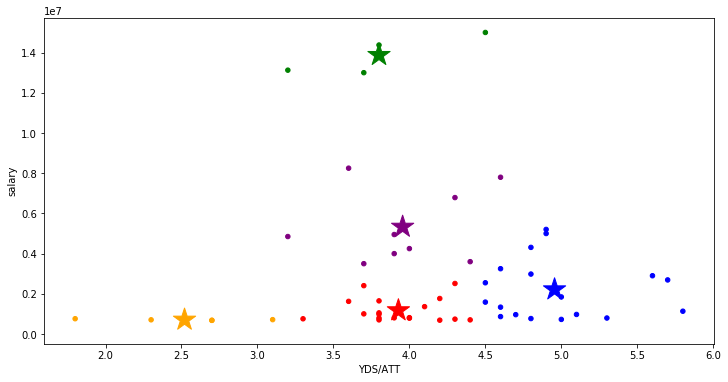

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'YDS/ATT', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS/ATT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

17.467094160258547

In [18]:
silhouette_score(X, km.labels_)

0.4310572230339763